<a href="https://colab.research.google.com/github/jazu1412/LOW_CODE_AUTOML_AUTOGLUON/blob/master/KAGGLE/ieee_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IEEE FRAUD DETECTION KAGGLE COMPETITION

In [1]:
pip install kaggle

In [3]:
pwd

'/content'

In [5]:
pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 23.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other require

In [2]:
import pandas as pd
import numpy as np
from autogluon.tabular import TabularPredictor

directory = 'sample_data/ieee-fraud-detection/'  # directory where you have downloaded the data CSV files from the competition
label = 'isFraud'  # name of target variable to predict in this competition
eval_metric = 'roc_auc'  # Optional: specify that competition evaluation metric is AUC
save_path = directory + 'AutoGluonModels/'  # where to store trained models

train_identity = pd.read_csv(directory+'train_identity.csv')
train_transaction = pd.read_csv(directory+'train_transaction.csv')

In [3]:
train_data = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')


In [6]:
predictor = TabularPredictor(label=label, eval_metric=eval_metric, path=save_path, verbosity=3).fit(
    train_data, presets='best_quality', time_limit=600, ag_args_fit={'num_gpus': 1}
)

results = predictor.fit_summary()

Verbosity: 3 (Detailed Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          12
GPU Count:          1
Memory Avail:       70.10 GB / 83.48 GB (84.0%)
Disk Space Avail:   192.08 GB / 235.68 GB (81.5%)
Presets specified: ['best_quality']
============ fit kwarg info ============
User Specified kwargs:
{'ag_args_fit': {'num_gpus': 1}, 'auto_stack': True, 'num_bag_sets': 1}
Full kwargs:
{'_feature_generator_kwargs': None,
 '_save_bag_folds': None,
 'ag_args': None,
 'ag_args_ensemble': None,
 'ag_args_fit': {'num_gpus': 1},
 'auto_stack': True,
 'calibrate': 'auto',
 'ds_args': {'clean_up_fits': True,
             'detection_time_frac': 0.25,
             'enable_ray_logging': True,
             'holdout_data': None,
             'holdout_frac': 0.1111111111111111,
             'memory_sa

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L3   0.865845     roc_auc       4.537629  392.952453                0.079010           4.059992            3       True          4
1    LightGBMXT_BAG_L1   0.865791     roc_auc       2.437925  207.246516                2.437925         207.246516            1       True          1
2  WeightedEnsemble_L2   0.865791     roc_auc       2.510467  207.326718                0.072542           0.080202            2       True          2
3    LightGBMXT_BAG_L2   0.831486     roc_auc       4.458619  388.892462                2.020694         181.645945            2       True          3
Number of models trained: 4
Types of models trained:
{'StackerEnsembleModel_LGB', 'WeightedEnsembleModel'}
Bagging used: True  (with 8 folds)
Multi-layer stack-ensembling used: True  

In [12]:
# Print the shape of the merged dataset
print(f"Shape of merged train data: {train_data.shape}")

# Print the number of features used for training
print(f"Number of features: {len(train_data.columns) - 1}")  # Subtract 1 to exclude the label column

# Print a summary of the predictor's performance
print("Model performance summary:")
print(results)


Shape of merged train data: (500997, 434)
Number of features: 433
Model performance summary:
{'model_types': {'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB', 'WeightedEnsemble_L2': 'WeightedEnsembleModel', 'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB', 'WeightedEnsemble_L3': 'WeightedEnsembleModel'}, 'model_performance': {'LightGBMXT_BAG_L1': 0.8657911462864974, 'WeightedEnsemble_L2': 0.8657911462864974, 'LightGBMXT_BAG_L2': 0.8314862019760608, 'WeightedEnsemble_L3': 0.8658449063742315}, 'model_best': 'WeightedEnsemble_L3', 'model_paths': {'LightGBMXT_BAG_L1': ['LightGBMXT_BAG_L1'], 'WeightedEnsemble_L2': ['WeightedEnsemble_L2'], 'LightGBMXT_BAG_L2': ['LightGBMXT_BAG_L2'], 'WeightedEnsemble_L3': ['WeightedEnsemble_L3']}, 'model_fit_times': {'LightGBMXT_BAG_L1': 207.24651646614075, 'WeightedEnsemble_L2': 0.08020162582397461, 'LightGBMXT_BAG_L2': 181.64594507217407, 'WeightedEnsemble_L3': 4.0599915981292725}, 'model_pred_times': {'LightGBMXT_BAG_L1': 2.437924861907959, 'WeightedEnsemb

In [13]:
# Select a few samples from the test data
sample_size = 5
test_samples = train_data.sample(n=sample_size, random_state=42)

# Make predictions
predictions = predictor.predict(test_samples)
probabilities = predictor.predict_proba(test_samples)

# Print predictions
print("\nSample Predictions:")
for i in range(sample_size):
    print(f"Sample {i+1}:")
    print(f"  Predicted class: {predictions.iloc[i]}")
    print(f"  Probability of fraud: {probabilities.iloc[i, 1]:.4f}")
    print(f"  Actual class: {test_samples[label].iloc[i]}")
    print("--------------------")

Loading: sample_data/ieee-fraud-detection/AutoGluonModels/models/LightGBMXT_BAG_L1/model.pkl
Loading: sample_data/ieee-fraud-detection/AutoGluonModels/models/LightGBMXT_BAG_L2/model.pkl
Loading: sample_data/ieee-fraud-detection/AutoGluonModels/models/WeightedEnsemble_L3/model.pkl
Loading: sample_data/ieee-fraud-detection/AutoGluonModels/models/LightGBMXT_BAG_L1/model.pkl
Loading: sample_data/ieee-fraud-detection/AutoGluonModels/models/LightGBMXT_BAG_L2/model.pkl
Loading: sample_data/ieee-fraud-detection/AutoGluonModels/models/WeightedEnsemble_L3/model.pkl



Sample Predictions:
Sample 1:
  Predicted class: 0
  Probability of fraud: 0.0580
  Actual class: 1
--------------------
Sample 2:
  Predicted class: 0
  Probability of fraud: 0.0262
  Actual class: 0
--------------------
Sample 3:
  Predicted class: 0
  Probability of fraud: 0.0341
  Actual class: 0
--------------------
Sample 4:
  Predicted class: 0
  Probability of fraud: 0.0247
  Actual class: 0
--------------------
Sample 5:
  Predicted class: 0
  Probability of fraud: 0.0274
  Actual class: 0
--------------------


In [20]:
test_identity = pd.read_csv(directory+'test_identity.csv')
test_transaction = pd.read_csv(directory+'test_transaction.csv')
test_data = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')  # same join applied to training files

y_predproba = predictor.predict_proba(test_data)
y_predproba.head(5)  # some example predicted fraud-probabilities

Loading: sample_data/ieee-fraud-detection/AutoGluonModels/models/LightGBMXT_BAG_L1/model.pkl
Loading: sample_data/ieee-fraud-detection/AutoGluonModels/models/LightGBMXT_BAG_L2/model.pkl
Loading: sample_data/ieee-fraud-detection/AutoGluonModels/models/WeightedEnsemble_L3/model.pkl


,0,1
0,0.975204,0.024796
1,0.972585,0.027415
2,0.973203,0.026797
3,0.977299,0.022701
4,0.976392,0.023608


In [21]:
y_predproba = predictor.predict_proba(test_data, as_multiclass=False)

Loading: sample_data/ieee-fraud-detection/AutoGluonModels/models/LightGBMXT_BAG_L1/model.pkl
Loading: sample_data/ieee-fraud-detection/AutoGluonModels/models/LightGBMXT_BAG_L2/model.pkl
Loading: sample_data/ieee-fraud-detection/AutoGluonModels/models/WeightedEnsemble_L3/model.pkl


In [22]:
submission = pd.read_csv(directory+'sample_submission.csv')
submission['isFraud'] = y_predproba
submission.head()
submission.to_csv(directory+'my_submission.csv', index=False)

#Submitted to kaggle


https://www.kaggle.com/jayasuryamurali

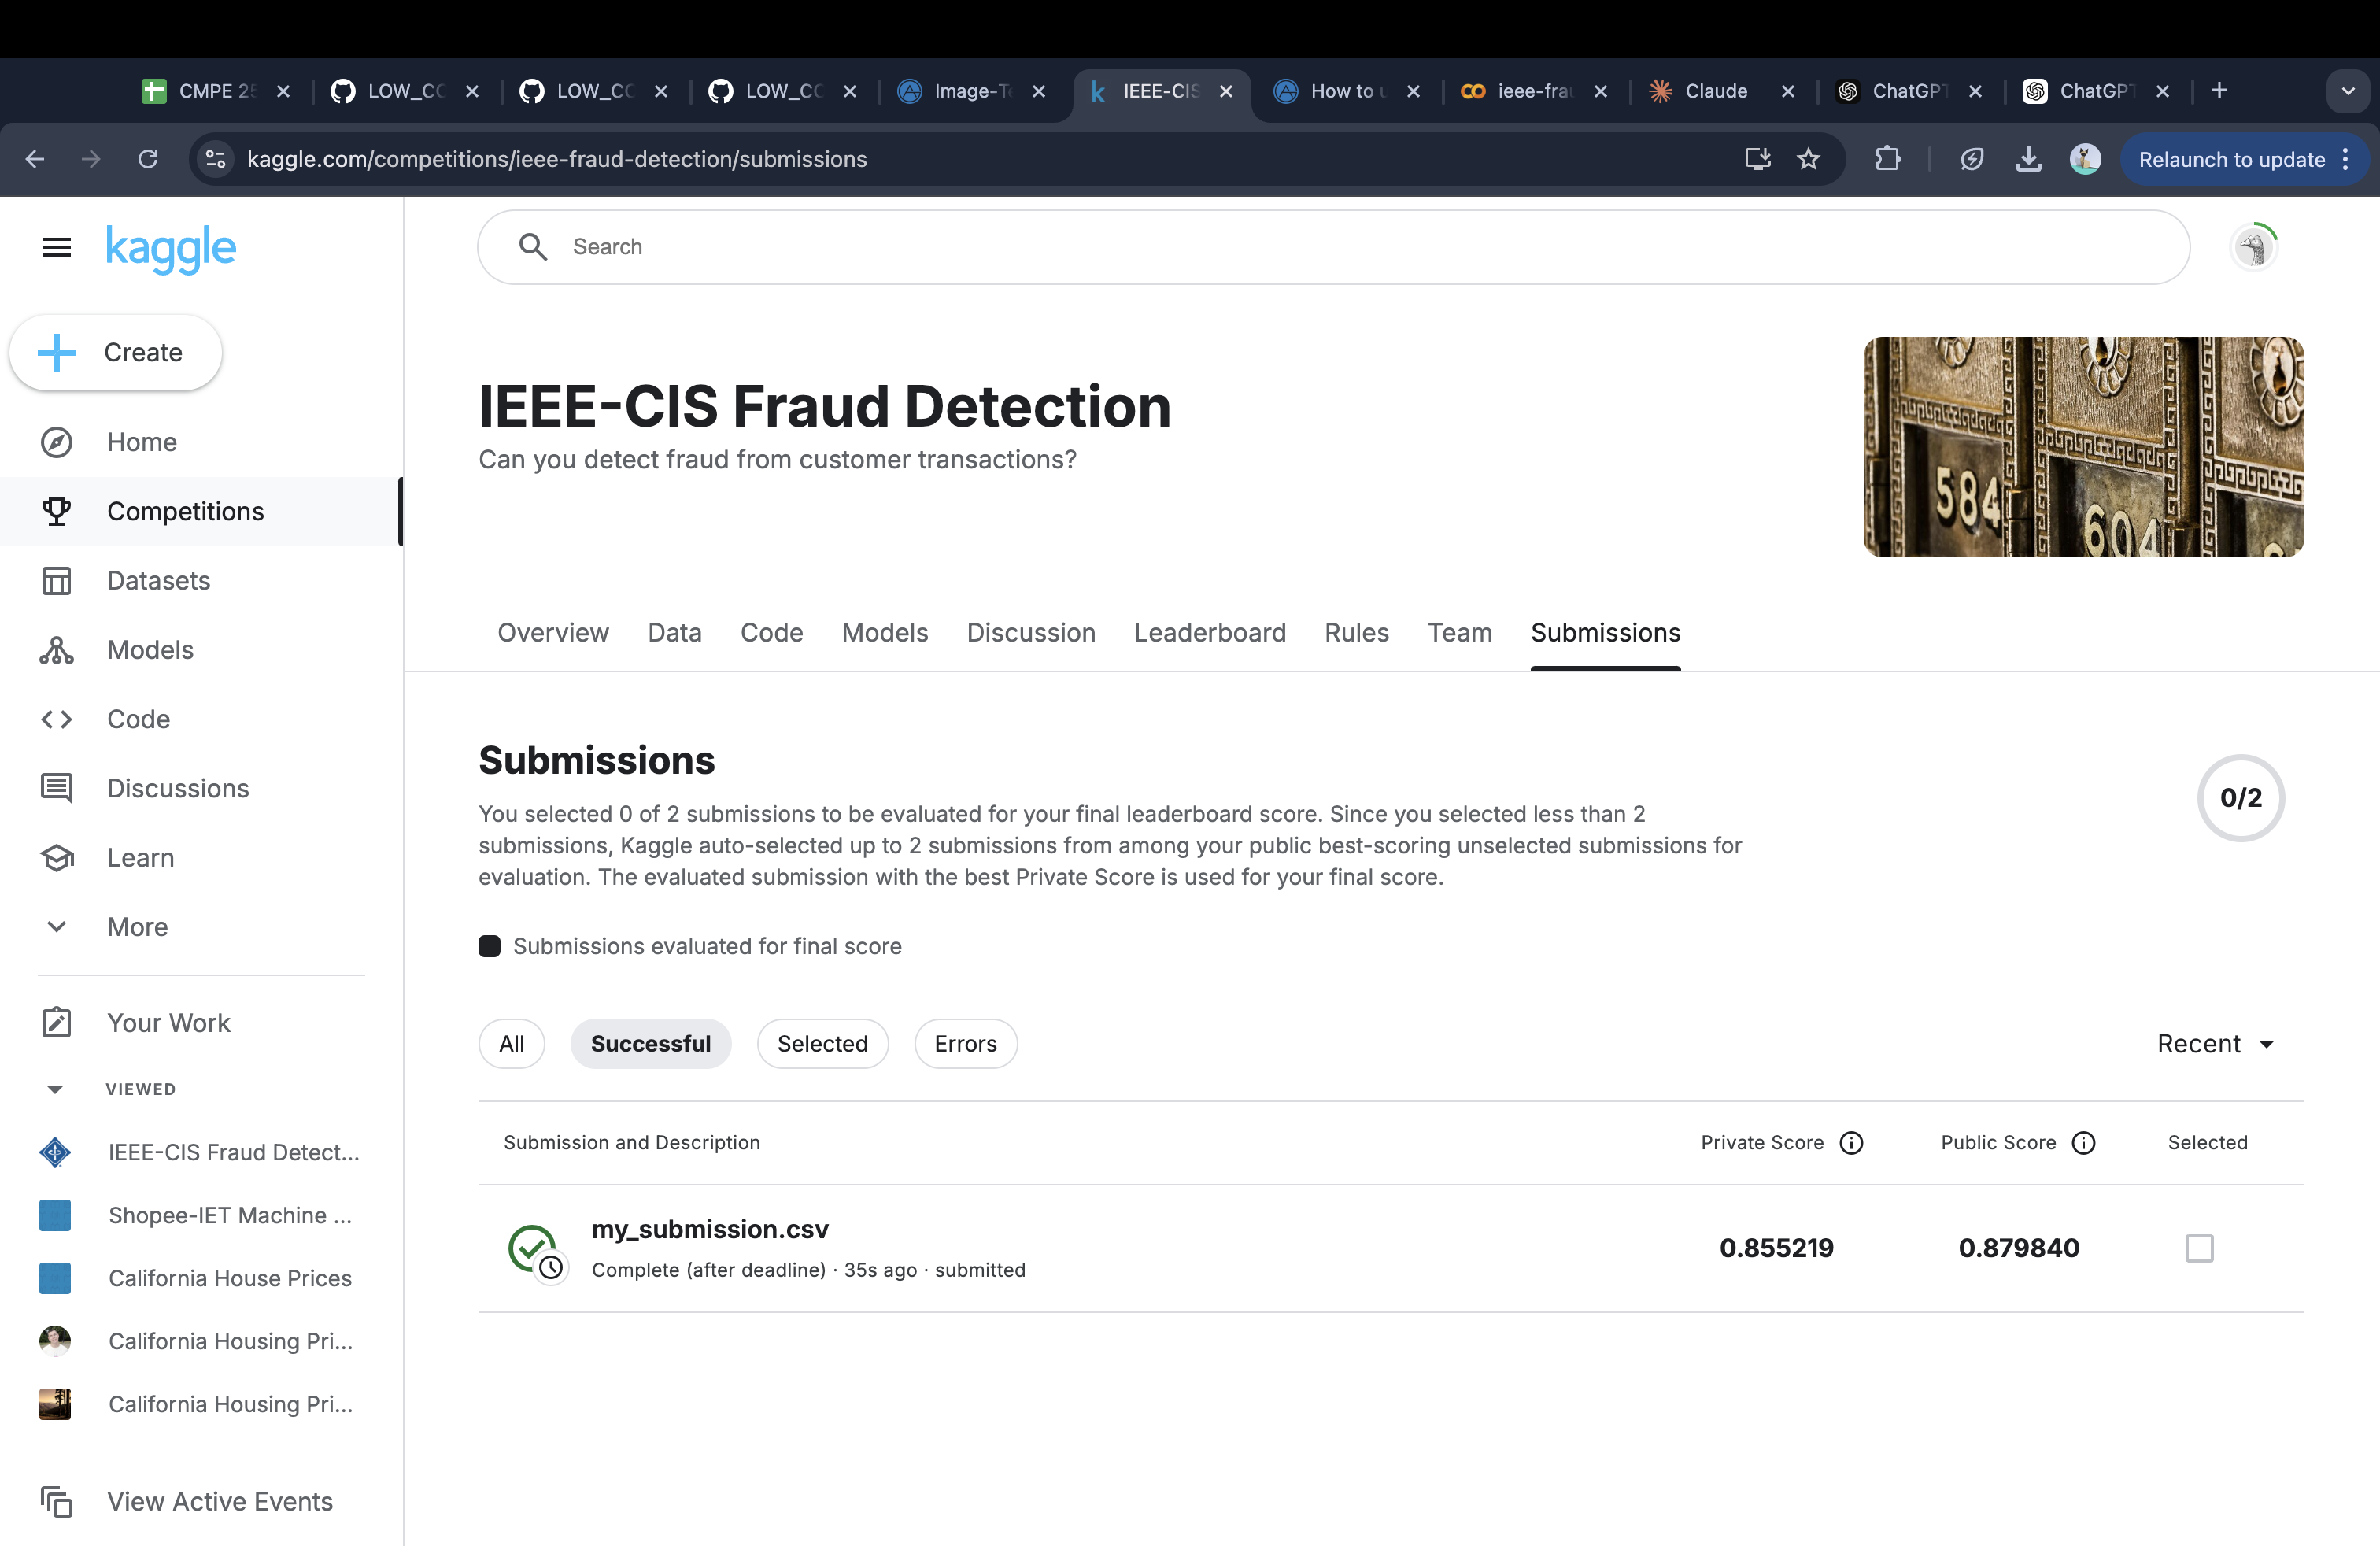